Find the directivity of an array with four ULA isotropic radiators. Plot the max broadside directivity as a function of the element spacing over the range $0 \leq d \leq 3\lambda$.

Overlay the directivity obtained with the conjugate field match solution.

$$ D = N*D_{el} $$

How to do the max directivity element excitation currents behave for very small element spacings.

Step 1: Find the overlap matrix

$$ A_{mn} = P_{rad}\frac{\sin(kr_{mn})}{kr_{mn}} $$

Step 2: Find $E_p(r)$

$$ E_0 = \sqrt{\frac{2\eta P_{rad}}{4\pi r^2}} $$
$$ E_p = E_0 * [1, 1, 1, 1]^T $$

Step 3: Find the weights

$$ w = A^{-1}E_p(r) $$

Step 4: Find the maximum directivity

$$ D(\Omega)=\frac{4\pi r^2 w^H B w}{w^H A w} $$

/tmp/ipykernel_437/2565753311.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  Ep[n] = E0*np.exp(1j*k*d*np.cos(theta)*rx[n])


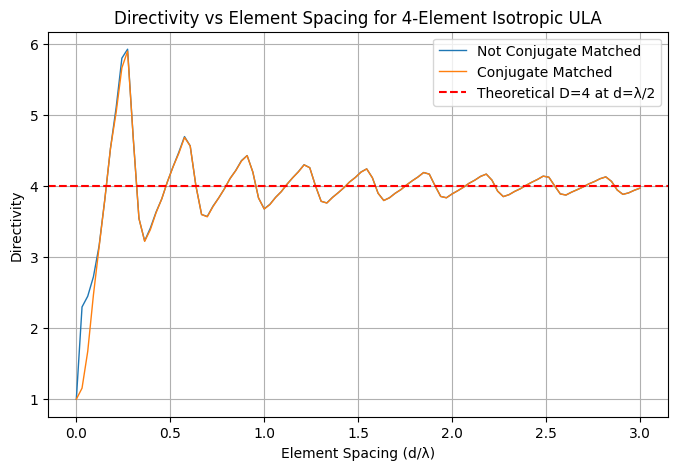

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#### VARIABLES ####
# Define antenna parameters
f = 1e9          # Frequency in Hz
c = 3e8          # Speed of light in m/s
lam = c / f      # Wavelength in m
k = 2 * np.pi / lam  # Wave number
eta = 377        # Intrinsic impedance of free space
Pel = 1          # Radiated power
r = 1            # Observation distance

# Define element spacing range
num_points = 100
d_values = np.linspace(0, 3*lam, num_points)  # Range of element spacings

# Number of elements in the array
N = 4

# Electric field calculation
E0 = np.sqrt(2*eta*Pel/(4*np.pi*r**2))

# empty array of directivity values
directivity_values = []
directivity_values_cm = []
                    




#### CALCULATIONS ####
for d in d_values:
    # Define the receiver positions
    rx = np.array([n * d for n in range(N)])  # Positions of elements
    
    ## Compute overlap matrix A ##
    A = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            r_mn = abs(rx[m] - rx[n])  # Distance between elements
            A[m, n] = np.sinc(k * r_mn)  # Corrected sinc function
    #print("Overlap Matrix \n", A)

    # broadside
    theta = np.pi/2
    ## compute Ep ##
    Ep = np.zeros((N,1))
    for n in range(N):
        Ep[n] = E0*np.exp(1j*k*d*np.cos(theta)*rx[n])
    #print("Ep \n", Ep)

    ## Compute weights ##
    A_inv = np.linalg.pinv(A)   # invert overlap
    w = np.dot(A_inv, Ep)        # Compute weights
    #print("weights \n", w)
    w_cm = Ep

    ## compute signal response ##
    B = Ep*Ep.conj().T / (2*eta)

    
    ## Compute Directivity ##
    w_herm = w.conj().T
    #print("hermitian of weights \n", w_herm)
    scalar = 4 * np.pi * (r**2)
    num_1 = np.dot(w_herm, B)
    num_2 = np.dot(num_1, w)
    den_1 = np.dot(w_herm, A)
    den_2 = np.dot(den_1, w)
    D = scalar * num_2 / den_2
    #print("Directivity \n", D)

    ## Compute Conjugate Matched Directivity ##
    w_herm = w_cm.conj().T
    #print("hermitian of weights \n", w_herm)
    scalar = 4 * np.pi * (r**2)
    num_1 = np.dot(w_herm, B)
    num_2 = np.dot(num_1, w_cm)
    den_1 = np.dot(w_herm, A)
    den_2 = np.dot(den_1, w_cm)
    D_cm = scalar * num_2 / den_2
    #print("Directivity \n", D_cm)

    # append zeros
    directivity_values.append(D[0,0])
    directivity_values_cm.append(D_cm[0,0])





#### PLOTS ####
plt.figure(figsize=(8, 5))
plt.plot(d_values / lam, directivity_values, label="Not Conjugate Matched", linewidth=1)
plt.plot(d_values / lam, directivity_values_cm, label="Conjugate Matched", linewidth=1)
plt.axhline(y=N, color='r', linestyle='--', label="Theoretical D=4 at d=λ/2")  # Reference line at 4
plt.xlabel("Element Spacing (d/λ)")
plt.ylabel("Directivity")
plt.title("Directivity vs Element Spacing for 4-Element Isotropic ULA")
plt.grid(True)
plt.legend()
plt.show()

Plot the pattern steered to endfire.

/tmp/ipykernel_437/1479381785.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  Ep[n] = E0*np.exp(1j*k*d*np.cos(theta)*rx[n])


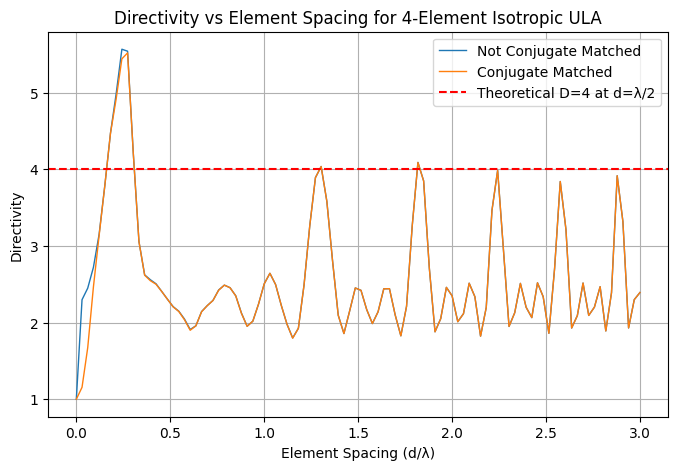

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### VARIABLES ####
# Define antenna parameters
f = 1e9          # Frequency in Hz
c = 3e8          # Speed of light in m/s
lam = c / f      # Wavelength in m
k = 2 * np.pi / lam  # Wave number
eta = 377        # Intrinsic impedance of free space
Pel = 1          # Radiated power
r = 1            # Observation distance

# Define element spacing range
num_points = 100
d_values = np.linspace(0, 3*lam, num_points)  # Range of element spacings

# Number of elements in the array
N = 4

# Electric field calculation
E0 = np.sqrt(2*eta*Pel/(4*np.pi*r**2))

# empty array of directivity values
directivity_values = []
directivity_values_cm = []
                    




#### CALCULATIONS ####
for d in d_values:
    # Define the receiver positions
    rx = np.array([n * d for n in range(N)])  # Positions of elements
    
    ## Compute overlap matrix A ##
    A = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            r_mn = abs(rx[m] - rx[n])  # Distance between elements
            A[m, n] = np.sinc(k * r_mn)  # Corrected sinc function
    #print("Overlap Matrix \n", A)

    # endfire
    theta = 0
    ## compute Ep ##
    Ep = np.zeros((N,1))
    for n in range(N):
        Ep[n] = E0*np.exp(1j*k*d*np.cos(theta)*rx[n])
    #print("Ep \n", Ep)

    ## Compute weights ##
    A_inv = np.linalg.pinv(A)   # invert overlap
    w = np.dot(A_inv, Ep)        # Compute weights
    #print("weights \n", w)
    w_cm = Ep

    ## compute signal response ##
    B = Ep*Ep.conj().T / (2*eta)

    
    ## Compute Directivity ##
    w_herm = w.conj().T
    #print("hermitian of weights \n", w_herm)
    scalar = 4 * np.pi * (r**2)
    num_1 = np.dot(w_herm, B)
    num_2 = np.dot(num_1, w)
    den_1 = np.dot(w_herm, A)
    den_2 = np.dot(den_1, w)
    D = scalar * num_2 / den_2
    #print("Directivity \n", D)

    ## Compute Conjugate Matched Directivity ##
    w_herm = w_cm.conj().T
    #print("hermitian of weights \n", w_herm)
    scalar = 4 * np.pi * (r**2)
    num_1 = np.dot(w_herm, B)
    num_2 = np.dot(num_1, w_cm)
    den_1 = np.dot(w_herm, A)
    den_2 = np.dot(den_1, w_cm)
    D_cm = scalar * num_2 / den_2
    #print("Directivity \n", D_cm)

    # append zeros
    directivity_values.append(D[0,0])
    directivity_values_cm.append(D_cm[0,0])





#### PLOTS ####
plt.figure(figsize=(8, 5))
plt.plot(d_values / lam, directivity_values, label="Not Conjugate Matched", linewidth=1)
plt.plot(d_values / lam, directivity_values_cm, label="Conjugate Matched", linewidth=1)
plt.axhline(y=N, color='r', linestyle='--', label="Theoretical D=4 at d=λ/2")  # Reference line at 4
plt.xlabel("Element Spacing (d/λ)")
plt.ylabel("Directivity")
plt.title("Directivity vs Element Spacing for 4-Element Isotropic ULA")
plt.grid(True)
plt.legend()
plt.show()

Repeat 4.8 for a uniform linear array of parallel half wave dipoles with the sinusoidalcurrent model using the LRMSA method.

1. Select the antenna element and find the isolated element pattern for an open circuit load. 

Find the electric field of a single dipole then put it into:

$$ E_n(r) = E_{el}(r)e^{jkrr_n} $$

2. Compute the pattern overlap matrix using analytical integration if possible for simple element types, or using numerical integrate.

$$ A_{mn} = \frac{1}{2\eta} \int E_m E_n^* r^2 d\Omega $$

3. Approximate the mutual impedance matrix using the pattern overlap matric using

$$ Z_a = \frac{2}{|I_0|^2}A $$

integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132794
I
 -0.6879417703891297
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132794
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.278

C:\Users\small\AppData\Local\Temp\ipykernel_36652\2847159309.py:131: RuntimeWarning: invalid value encountered in divide
  D = scalar * num_2 / den_2
C:\Users\small\AppData\Local\Temp\ipykernel_36652\2847159309.py:142: RuntimeWarning: divide by zero encountered in divide
  D_cm = scalar * num_2 / den_2
C:\Users\small\AppData\Local\Temp\ipykernel_36652\2847159309.py:142: RuntimeWarning: invalid value encountered in divide
  D_cm = scalar * num_2 / den_2


I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.278812297811328
I
 -0.6879417703891298
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.278812297811328
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132794
I
 -0.6879417703891297
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132794
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-0.27881229781132805
I
 -0.68794177038913
integrand
0.7071067811865476
0.6279332232978173
0.6279332232978173
0.27881229781132805
I
 0.0
integrand
-0.7071067811865476
0.6279332232978173
0.6279332232978173
-

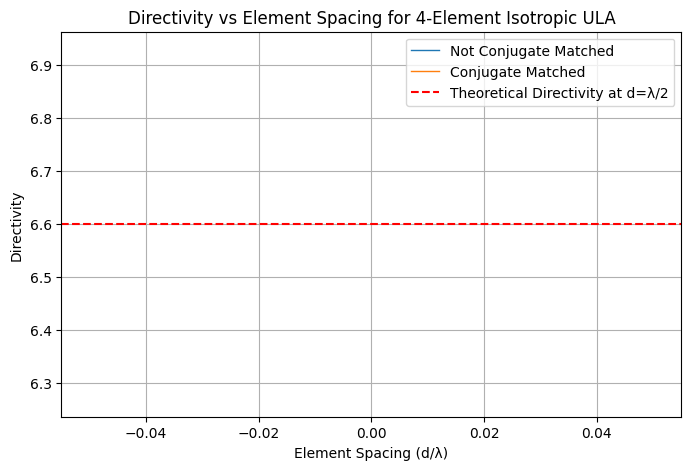

In [ ]:
#FOLLOWING THE STEPS OUTLINE IN SECTION 4.14.1 APPLYING THE LOSSLESS RESONANT MINIMUM SCATTERING APPROXIMATION
#EACH ELEMENT IS A HALF-WAVE DIPOLE

########### IMPORTS #############
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi



###################################################################### DEFINITIONS ########################################################

# use the half-wave dipole radiation pattern on page 84
def radiation_pattern(theta, k, l):
    #print("radiation integral\n", (np.cos(k*l*np.cos(theta)/2)-np.cos(k*l/2)) / np.sin(theta)) # debug radiation pattern
    return np.abs((np.cos(k*l*np.cos(theta)/2)-np.cos(k*l/2)) / np.sin(theta))
     
# phase shift the radiation pattern by the distance between the elements
def phase_shifted(phase_shift, theta, f):
    lam = 3e8 / f       # Wavelength in m
    k = 2*np.pi / lam   # Wave number
    l = lam / 2         # Half-wave dipole length
    #print("phase shifted \n", np.abs(np.exp(1j * k * phase_shift * np.cos(theta)) * radiation_pattern(theta, k, l)))   # debug phase shifted
    return np.abs(np.exp(1j * k * phase_shift * np.cos(theta)) * radiation_pattern(theta, k, l))

# integrand for the overlap integral outling in section 4.8.3
def integrand(theta, phi, rx_m, rx_n, f):
    print("integrand")  # debug integrand                                       
    print(np.sin(theta))                    
    print(phase_shifted(rx_m, theta, f))
    print(phase_shifted(rx_m, theta, f))
    print(phase_shifted(rx_m, theta, f) * phase_shifted(rx_n, phi, f) * np.sin(theta))
    return phase_shifted(rx_m, theta, f) * phase_shifted(rx_n, phi, f) * np.sin(theta)

# compute the overlap integral as outlined in section 4.8.3
def overlap_integral(N, f, rx):
    A = np.zeros((N, N))                                                                    # initialize the overlap matrix
    for m in range(N):
        for n in range(N):
            #I, _ = spi.quad(lambda theta: integrand(theta, rx[m], rx[n], f), 0, np.pi)     # python function to implement the quadrature rule

            # numerical implementation of the quadrature rule according to equations 4.69 and 4.70
            I = 0                                                                           # initialize the integral
            del_phi = 2*np.pi/N                                                             # integration weights
            del_theta = del_phi                                                             # integration weights
            for i in range(N):
                phi_i = (i - 1/2) * del_phi                                                 # midpoint for each integration step
                for j in range(int(N/2)):
                    theta_j = (j - 1/2) * del_theta                                         # midpoint for each integration step
                    I += integrand(theta_j, phi_i, rx[m], rx[n], f) * del_phi * del_theta   # integral approximation
                    print("I\n", I)                                                         # debug integral                     
            #print("I \n", I)                                                               # debug integral                                 

            A[m, n] = I                                                                     # assign the value of the integral to the overlap matrix

    #print("Overlap Matrix \n", A)                                                          # debug overlap matrix                                  
    return A

# scale the the overlap integral using equation 4.108
def mutual_impedance_matrix(Im, N, f, rx):
    #scalar = 1j*Im/(2*np.pi*r)             # Amplitude of the E-Field of a dipole on page 84
    scalar = 2/np.abs(Im)**2                # Equation 4.108
    #scalar = 73.5                          # impedance of a half wave dipole

    Z = scalar * overlap_integral(N, f, rx) # mutual impedance matrix
    #print("Mutual Impedance Matrix \n", Z)
    return Z



########################################### VARIABLES ############################################
# Define antenna parameters
f = 1e9                 # Frequency in Hz
c = 3e8                 # Speed of light in m/s
lam = c / f             # Wavelength in m
k = 2 * np.pi / lam     # Wave number
eta = 377               # Intrinsic impedance of free space
Pel = 1                 # Radiated power
r = 1                   # Observation distance
l = lam / 2             # Half-wave dipole length
Im = 1                  # Mutual impedance
psi = np.pi/2           # broadside or endfire

# Define element spacing range
num_points = 100
d_values = np.linspace(0, 3*lam, num_points)  # Range of element spacings

# Number of elements in the array
N = 4

# empty array of directivity values
directivity_values = []
directivity_values_cm = []




################################################## MAIN ##########################################################
for d in d_values:
    ## Define the receiver positions ##
    rx = np.array([n * d for n in range(N)])    # Positions of elements

    ## compute Ep ##
    Ep = np.zeros((N, 1), dtype=complex)        # Initialize electric field
    #scalar = 1j * Im / (2 * np.pi * r)         # Amplitude of the E-Field of a dipole on page 84
    scalar = 2/np.abs(Im)**2                    # Equation 4.108
    #scalar = 73.5                              # impedance of a half wave dipole

    # Ep loop for broadside
    for n in range(N):
        Ep[n] = scalar*radiation_pattern(psi, k, l)*np.exp(1j*k*d*np.cos(psi)*rx[n]) # Compute electric field
    #print("Ep \n", Ep)                         # debug e-field

    ## Compute weights ##
    A = mutual_impedance_matrix(Im, N, f, rx)   # compute mutual impedance matrix
    A_inv = np.linalg.pinv(A)                   # invert overlap
    w = np.dot(A_inv, Ep)                       # Compute weights equation 4.86
    #print("weights \n", w)                     # debug weights
    w_cm = Ep                                   # Conjugate matched weights

    ## compute signal response ##
    B = Ep*Ep.conj().T / (2*eta)    # Compute signal response equation 4.66
    
    ## Compute Directivity using equation 4.63 ##
    w_herm = w.conj().T                         # Compute hermitian of weights
    #print("hermitian of weights \n", w_herm)   # debug hermitian of weights
    scalar = 4 * np.pi * (r**2) / Pel           # Compute directivity scalar
    wB = np.dot(w_herm, B)
    numerator = np.dot(wB, w)
    wA = np.dot(w_herm, A)
    denominator = np.dot(wA, w)
    D = scalar * numerator / denominator        # Compute directivity equation 4.63
    #print("Directivity \n", D)                 # debug directivity

    ## Compute Conjugate Matched Directivity ##
    w_herm = w_cm.conj().T
    #print("hermitian of weights \n", w_herm)
    wB = np.dot(w_herm, B)
    numerator = np.dot(wB, w_cm)
    wA = np.dot(w_herm, A)
    denominator = np.dot(wA, w_cm)
    D_cm = scalar * numerator / denominator         # Compute directivity equation 4.63
    #print("Directivity \n", D_cm)                  # debug directivity

    # append zeros
    directivity_values.append(D[0,0])
    directivity_values_cm.append(D_cm[0,0])

# equation 4.90 used as a target directivity
Del = 1.65              # directivity of a half-wave dipole
d_theoretical = N * Del # theoretical directivity of the array


####################################################### PLOTS ###########################################################
plt.figure(figsize=(8, 5))
plt.plot(d_values / lam, directivity_values, label="Not Conjugate Matched", linewidth=1)
plt.plot(d_values / lam, directivity_values_cm, label="Conjugate Matched", linewidth=1)
plt.axhline(y=d_theoretical, color='r', linestyle='--', label="Theoretical Directivity at d=λ/2")  # Reference line
plt.xlabel("Element Spacing (d/λ)")
plt.ylabel("Directivity")
plt.title("Directivity vs Element Spacing for 4-Element Isotropic ULA")
plt.grid(True)
plt.legend()
plt.show() 

C:\Users\small\AppData\Local\Temp\ipykernel_35008\1411279014.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  P_rad = np.trapz(radiation_intensity, theta) * 2 * np.pi


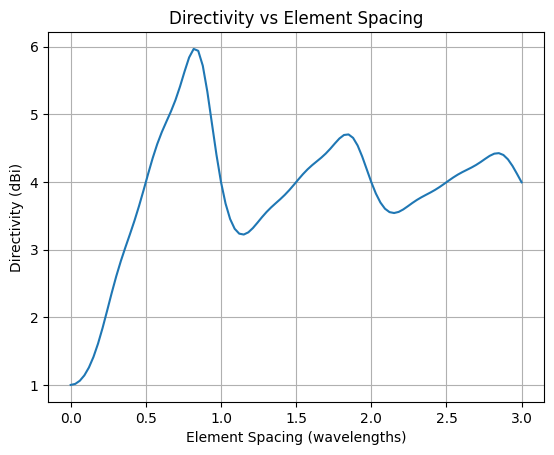

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def dipole_radiation_pattern(theta):
    """Radiation pattern of a half-wave dipole."""
    return np.abs(np.cos(np.pi/2 * np.cos(theta)) / np.sin(theta))

def phase_shifted_pattern(theta, phase_shift):
    """Phase-shifted element pattern."""
    return dipole_radiation_pattern(theta) * np.exp(1j * phase_shift)

def overlap_integrand(theta, phase_shift1, phase_shift2):
    """Integrand for the overlap matrix calculation."""
    return np.conj(phase_shifted_pattern(theta, phase_shift1)) * phase_shifted_pattern(theta, phase_shift2) * np.sin(theta)

def compute_overlap_matrix(N):
    """Compute the overlap matrix using numerical integration."""
    overlap_matrix = np.zeros((N, N), dtype=complex)
    for m in range(N):
        for n in range(N):
            result, _ = quad(lambda theta: overlap_integrand(theta, m * np.pi/4, n * np.pi/4), 0, np.pi)
            overlap_matrix[m, n] = result
    return overlap_matrix

def compute_mutual_impedance_matrix(overlap_matrix):
    """Approximate the mutual impedance matrix using the overlap matrix."""
    Z0 = 120 * np.pi  # Intrinsic impedance of free space
    return Z0 * overlap_matrix

def compute_directivity(N, d):
    """Compute directivity for given element spacing."""
    theta = np.linspace(1e-3, np.pi - 1e-3, 1000)
    radiation_pattern = np.abs(np.sum([np.exp(1j * n * 2 * np.pi * d * np.cos(theta)) for n in range(N)], axis=0))
    radiation_intensity = radiation_pattern**2 * np.sin(theta)
    U_max = np.max(radiation_intensity)
    P_rad = np.trapz(radiation_intensity, theta) * 2 * np.pi
    return 4 * np.pi * U_max / P_rad

# Parameters
N = 4  # Example number of elements
d_values = np.linspace(0, 3, 100)  # Element spacings from 0 to 3 * lambda

directivities = [compute_directivity(N, d) for d in d_values]

# Plotting
plt.plot(d_values, directivities)
plt.title('Directivity vs Element Spacing')
plt.xlabel('Element Spacing (wavelengths)')
plt.ylabel('Directivity (dBi)')
plt.grid(True)
plt.show()
